In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pdkit import TremorProcessor
from scipy.signal import welch


In [2]:
# Update these paths with full valid RDS paths
pd_file = '/rds/general/user/nk2622/projects/ppmi_verily/live/STUDYWATCH/3028/accelerometer/csv/3028_firstweek_goodweartime_updrs.csv'
hc_file = '/rds/general/user/nk2622/projects/ppmi_verily/live/STUDYWATCH/3055/accelerometer/csv/3055_firstweek_goodweartime_corrected.csv'


In [3]:
df_pd = pd.read_csv(pd_file)
df_hc = pd.read_csv(hc_file)

print(df_pd.columns)
df_pd.head()


Index(['time', 'x', 'y', 'z'], dtype='object')


,time,x,y,z
0,2019-03-12 12:13:58.318,-0.052246,-0.265137,-0.948242
1,2019-03-12 12:13:58.323,-0.051758,-0.263184,-0.946777
2,2019-03-12 12:13:58.329,-0.051270,-0.262207,-0.949707
3,2019-03-12 12:13:58.334,-0.054688,-0.265137,-0.947266
4,2019-03-12 12:13:58.339,-0.053711,-0.267090,-0.946777


In [4]:
import numpy as np

def convert_time(df):
    df['time'] = pd.to_datetime(df['time'])
    df['td'] = (df['time'] - df['time'].iloc[0]).dt.total_seconds()
    return df

df_pd = convert_time(df_pd)
df_hc = convert_time(df_hc)


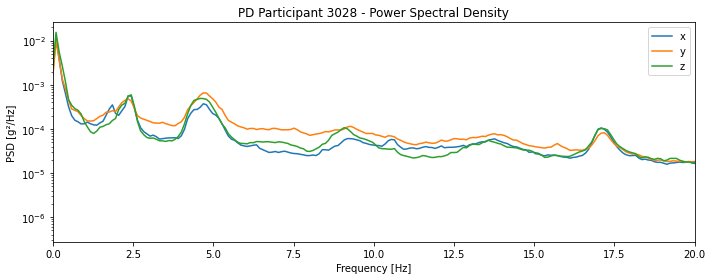

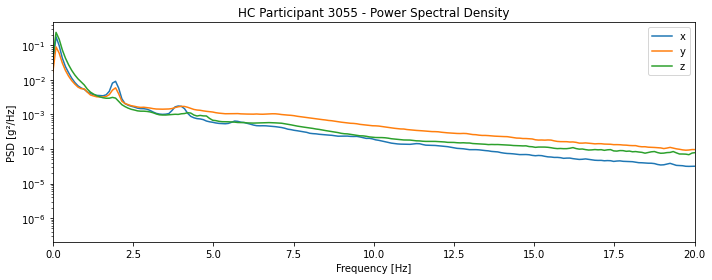

In [8]:
from scipy.signal import welch

def plot_psd(df, title, fs=100):
    plt.figure(figsize=(10, 4))
    for axis in ['x', 'y', 'z']:
        f, Pxx = welch(df[axis], fs=fs, nperseg=1024)
        plt.semilogy(f, Pxx, label=axis)
    plt.title(title + ' - Power Spectral Density')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [g²/Hz]')
    plt.xlim(0, 20)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_psd(df_pd, 'PD Participant 3028')
plot_psd(df_hc, 'HC Participant 3055')


In [11]:
print("PD duration:", df_pd_ready['td'].iloc[-1])
print("HC duration:", df_hc_ready['td'].iloc[-1])

print("Mean PD sampling interval:", df_pd_ready['td'].diff().mean())
print("Mean HC sampling interval:", df_hc_ready['td'].diff().mean())


PD duration: 42322.466
HC duration: 557129.136
Mean PD sampling interval: 0.010804421998379941
Mean HC sampling interval: 0.020561570415857513
